# Extract green and red lines that we haven't got yet from PZ cube

* We have a small window between 5400 and 6100 Å, where we haven't extracted any lines yet.  I think it only has [N II] and He I, but there might also be a weak He II line at 5400 Å.

* We also want to get the [Ar III] and [O II] lines from the 7000 to 8000 Å range. And there are the infrared lines for 8000+, but maybe they can wait.

In [2]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mpdaf.obj import Cube
import regions
import sys
from whispy import moments
from whispy import extract

sns.set_context("talk")
sns.set_color_codes()

In [3]:
moments.FIGPATH = Path("../../figs")
moments.SAVEPATH = Path("../../data")

Load up the cube, as per previous notebooks.

In [4]:
datapath = Path("/Users/will/Work/Muse-Hii-Data/SMC-NGC-346/")
fitsfilepath = datapath / "PeterZeidler" / "DATACUBE_FINAL_fwhm_cor.fits"
cube0 = Cube(str(fitsfilepath))

Get all the regions from previous notebooks:

In [5]:
# Position of mYSO
x, y = 116, 147
# position of B0 star SSN 43
xb, yb = 95, 163
# position of B0 star SSN 40
xbb, ybb = 121, 133
m = 3


# These are defined with respect to mcube
mboxes = {
    #    "sw filament": regions.BoundingBox(
    #        iymin=30, iymax=50, ixmin=300, ixmax=330,
    #    ),
    "bow shock": regions.BoundingBox(
        iymin=165,
        iymax=205,
        ixmin=240,
        ixmax=290,
    ),
    "w filament": regions.BoundingBox(
        iymin=100,
        iymax=130,
        ixmin=25,
        ixmax=55,
    ),
    "c filament": regions.BoundingBox(
        iymin=195,
        iymax=210,
        ixmin=155,
        ixmax=195,
    ),
    "blue": regions.BoundingBox(iymin=75, iymax=140, ixmin=15, ixmax=40),
    "red": regions.BoundingBox(iymin=200, iymax=250, ixmin=210, ixmax=300),
    "magenta": regions.BoundingBox(iymin=10, iymax=50, ixmin=100, ixmax=150),
    "green": regions.BoundingBox(iymin=10, iymax=100, ixmin=200, ixmax=300),
    "cyan": regions.BoundingBox(iymin=170, iymax=210, ixmin=90, ixmax=120),
}

# These are defined with respect to the sharp cube
sboxes = {
    "SSN 152+168": regions.BoundingBox(
        iymin=y - m,
        iymax=y + m,
        ixmin=x - m,
        ixmax=x + m,
    ),
    "SSN 43": regions.BoundingBox(
        iymin=yb - m,
        iymax=yb + m,
        ixmin=xb - m,
        ixmax=xb + m,
    ),
    "SSN 40": regions.BoundingBox(
        iymin=ybb - m,
        iymax=ybb + m,
        ixmin=xbb - m,
        ixmax=xbb + m,
    ),
}

## Start with the green range

In [6]:
wavmin, wavmax = 5300, 6100
cube = cube0.select_lambda(wavmin, wavmax)

So in this version we do not have the `mcube`

In [7]:
wavranges = [
    (5305, 5315),
    (5350, 5360),
    (5390, 5400),
    (5450, 5500),
    (5560, 5570),
    (5600, 5740),
    (5765, 5780),
    (5820, 5835),
    (5850, 5870),
    (5905, 5915),
    (6000, 6030),
    (6050, 6100),
]

        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]


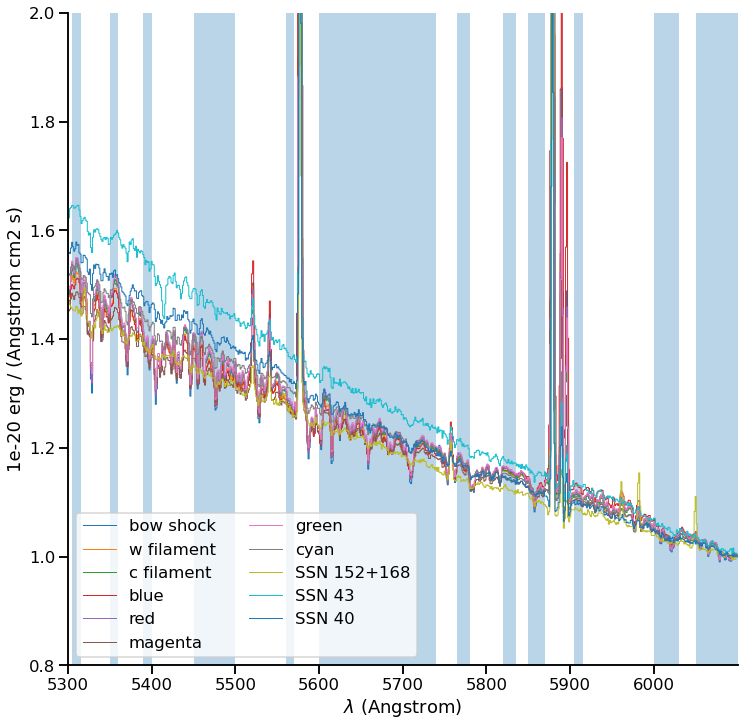

In [8]:
fig, ax = plt.subplots(figsize=(12, 12))

for label, box in mboxes.items():
    yslice, xslice = box.slices
    spec = cube[:, yslice, xslice].mean(axis=(1, 2))
    (spec / spec.data[-1]).plot(label=label)

for label, box in sboxes.items():
    yslice, xslice = box.slices
    spec = cube[:, yslice, xslice].mean(axis=(1, 2))
    (spec / spec.data[-1]).plot(label=label)

for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.legend(ncol=2)
ax.set(
    ylim=[0.8, 2.0],
)
sns.despine()

In [9]:
yslice, xslice = sboxes["SSN 152+168"].slices
subcube = cube[:, yslice, xslice]
contcube = extract.fit_continuum(
    subcube,
    wav_ranges=wavranges,
    deg=6,
    median=False,
)

extract.fit_continuum: row 0


        Use get_overlap_slices instead. [warnings]


[(1500.0, 3000.0)]

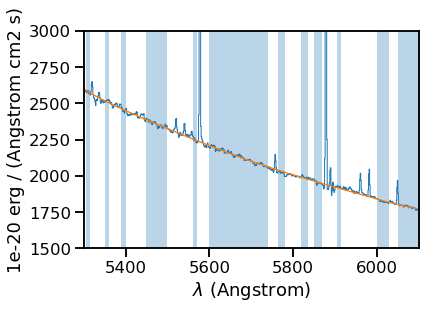

In [12]:
fig, ax = plt.subplots()
subcube.mean(axis=(1, 2)).plot()
contcube.mean(axis=(1, 2)).plot()
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(ylim=[1500, 3000])

In [14]:
yslice, xslice = mboxes["bow shock"].slices
subcube = cube[:, yslice, xslice]
contcube = extract.fit_continuum(
    subcube,
    wav_ranges=wavranges,
    deg=6,
    median=False,
)

        Use get_overlap_slices instead. [warnings]


extract.fit_continuum: row 0
extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30


[(200.0, 500.0)]

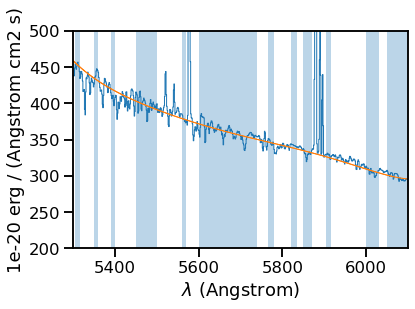

In [19]:
fig, ax = plt.subplots()
subcube.mean(axis=(1, 2)).plot()
contcube.mean(axis=(1, 2)).plot()
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(ylim=[200, 500])

In [20]:
contcube = extract.fit_continuum(
    cube,
    wav_ranges=wavranges,
    deg=6,
    median=False,
)

extract.fit_continuum: row 0


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30
extract.fit_continuum: row 40
extract.fit_continuum: row 50
extract.fit_continuum: row 60
extract.fit_continuum: row 70
extract.fit_continuum: row 80
extract.fit_continuum: row 90
extract.fit_continuum: row 100


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:299: RuntimeWarning: divide by zero encountered in double_scalars
  off = (old[1]*new[0] - old[0]*new[1])/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:300: RuntimeWarning: divide by zero encountered in true_divide
  scl = newlen/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:368: RuntimeWarning: invalid value encountered in add
  return off + scl*x


extract.fit_continuum: row 110
extract.fit_continuum: row 120
extract.fit_continuum: row 130
extract.fit_continuum: row 140
extract.fit_continuum: row 150
extract.fit_continuum: row 160
extract.fit_continuum: row 170
extract.fit_continuum: row 180
extract.fit_continuum: row 190
extract.fit_continuum: row 200
extract.fit_continuum: row 210
extract.fit_continuum: row 220
extract.fit_continuum: row 230
extract.fit_continuum: row 240
extract.fit_continuum: row 250
extract.fit_continuum: row 260
extract.fit_continuum: row 270
extract.fit_continuum: row 280
extract.fit_continuum: row 290
extract.fit_continuum: row 300
extract.fit_continuum: row 310
extract.fit_continuum: row 320


        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]


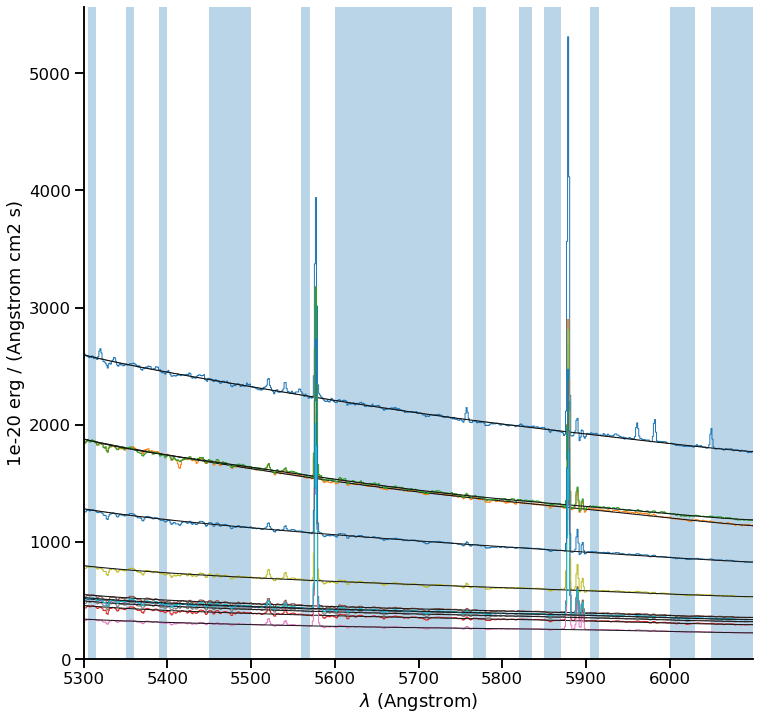

In [25]:
fig, ax = plt.subplots(figsize=(12, 12))
for box in list(sboxes.values()) + list(mboxes.values()):
    yslice, xslice = box.slices
    spec = cube[:, yslice, xslice].mean(axis=(1, 2))
    cspec = contcube[:, yslice, xslice].mean(axis=(1, 2))
    spec.plot()
    cspec.plot(color="k")

for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(
    ylim=[0, None],
)
sns.despine()

In [22]:
prefix = f"../../big-data/ngc346-PZ-{wavmin:d}-{wavmax:d}-cube"
csubcube = cube - contcube
cdivcube = cube / contcube
csubcube.write(
    f"{prefix}-contsub.fits",
    savemask="nan",
)
cdivcube.write(
    f"{prefix}-contdiv.fits",
    savemask="nan",
)
contcube.write(
    f"{prefix}-cont.fits",
    savemask="nan",
)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)


### Extract He I 5875 line

In [26]:
mom5875 = moments.find_moments(csubcube.select_lambda(5874, 5885))

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:43: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


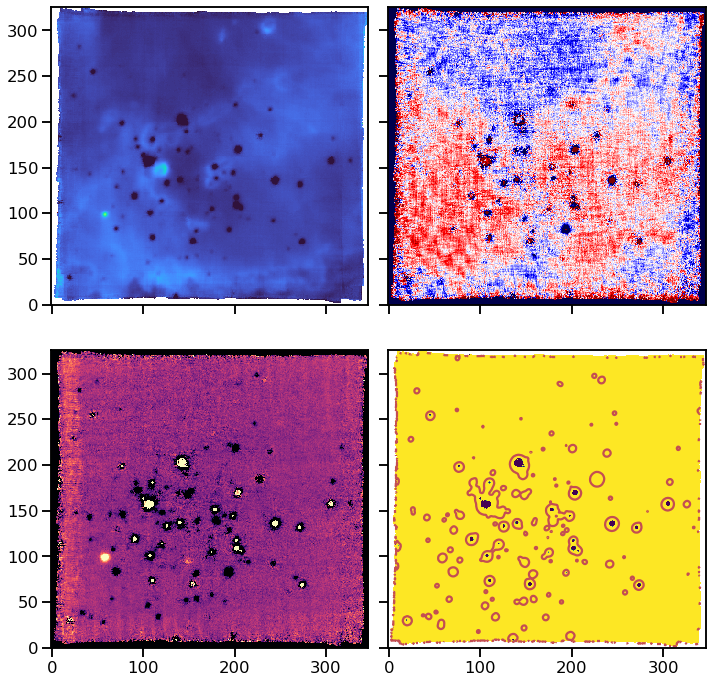

In [33]:
fig, axes = plt.subplots(
    2,
    2,
    figsize=(10, 10),
    sharex=True,
    sharey=True,
)

imap = mom5875[0].copy()
vmap = 3e5 * (mom5875[1] / 5875.62 - 1.0)
smap = 3e5 * (mom5875[2] / 5875.62)

# m = imap.data > 10.

# vmap.mask = vmap.mask | (~m)
# smap.mask = smap.mask | (~m)

imap.rebin(1).plot(
    vmin=1e3,
    vmax=3e4,
    cmap="turbo",
    ax=axes[0, 0],
)

vmap.rebin(1).plot(
    vmin=150,
    vmax=180,
    cmap="seismic",
    ax=axes[0, 1],
)

smap.rebin(1).plot(
    vmin=30,
    vmax=100,
    cmap="magma",
    ax=axes[1, 0],
)

imap.rebin(1).plot(
    vmin=-500,
    vmax=0,
    cmap="viridis",
    ax=axes[1, 1],
)
bg_5875 = contcube.select_lambda(5874, 5885).mean(axis=0)
axes[1, 1].contour(
    bg_5875.data,
    levels=[1000],
    colors="r",
)

fig.tight_layout()

No need to fix sky

In [34]:
core_5875 = csubcube.select_lambda(5864, 5895)

In [35]:
mom5875 = moments.find_moments(core_5875.select_lambda(5874, 5885))

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:43: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


In [41]:
mom_pars = dict(
    restwav=5875.62,
    irange=[1.0e3, 3.5e4],
    vrange=[150, 180],
    srange=[30, 100],
)

In [55]:
moments.save_moments_to_fits(
    mom5875,
    label="5875",
    flabel="ngc346-PZ-hei",
    **mom_pars,
)

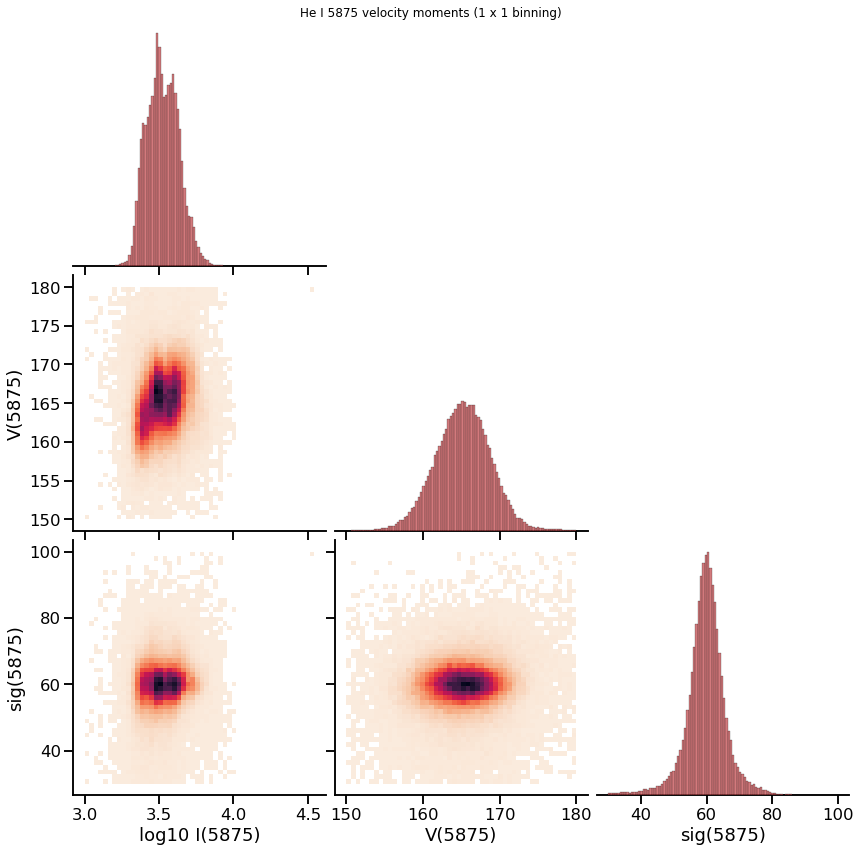

In [56]:
plot_pars = dict(
    ilabel="He I",
    label="5875",
    flabel="ngc346-PZ-hei",
    **mom_pars,
)
g = moments.moments_corner_plot(
    mom5875,
    rebin=1,
    **plot_pars,
)

This shows exatly the same 3 clumps in the I-V plane as we see in the H lines. But the sigma behavior is more homogeneous, with no evidence that sigma varies with anything. 

I think this line is a triplet, so it may be that the sigma has a contribution from the fine structure splitting. 

### Extract [Cl III] lines

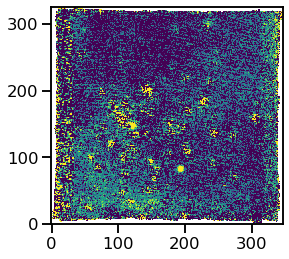

In [49]:
csubcube.select_lambda(5500, 5550).sum(axis=0).plot(vmin=300, vmax=900, scale="sqrt")

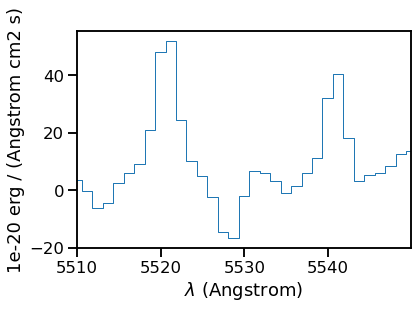

In [51]:
csubcube.select_lambda(5510, 5550).median(axis=(1, 2)).plot()

In [52]:
mom5518 = moments.find_moments(csubcube.select_lambda(5518, 5525))
mom5538 = moments.find_moments(csubcube.select_lambda(5538, 5545))

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:43: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:43: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


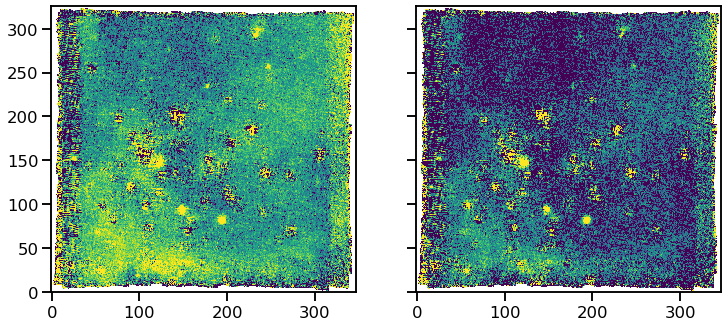

In [54]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
mom5518[0].plot(ax=axes[0], vmin=100, vmax=300, scale="sqrt")
mom5538[0].plot(ax=axes[1], vmin=100, vmax=300, scale="sqrt")

In [57]:
moments.save_moments_to_fits(
    mom5518,
    label="5518",
    flabel="ngc346-PZ-cliii",
    restwav=5517.71,
)
moments.save_moments_to_fits(
    mom5538,
    label="5538",
    flabel="ngc346-PZ-cliii",
    restwav=5537.88,
)

### Extract [N II] line

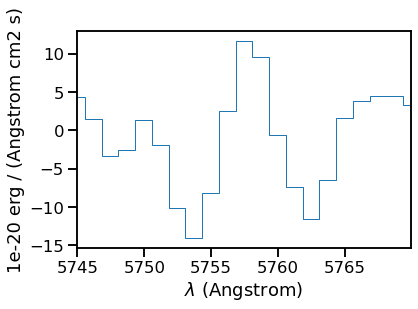

In [58]:
csubcube.select_lambda(5745, 5770).median(axis=(1, 2)).plot()

In [59]:
mom5755 = moments.find_moments(csubcube.select_lambda(5755, 5762))

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:43: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


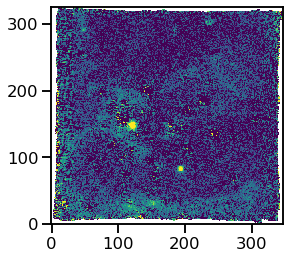

In [60]:
mom5755[0].plot(vmin=0.0, vmax=300.0, scale="sqrt")

In [61]:
moments.save_moments_to_fits(
    mom5755,
    label="5755",
    flabel="ngc346-PZ-nii",
    restwav=5755.08,
)

## Second, the red range

In [62]:
wavmin, wavmax = 6750, 7800
cube = cube0.select_lambda(wavmin, wavmax)

In [63]:
avspec = cube.mean(axis=(1, 2))

In [64]:
wavranges = [
    (6750, 6770),
    (6810, 6820),
    (6960, 6980),
    (7010, 7030),
    (7080, 7090),
    (7115, 7125),
    (7200, 7220),
    (7342, 7355),
    (7400, 7415),
    (7490, 7500),
    (7540, 7570),
    (7680, 7700),
    (7760, 7775),
]

        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]


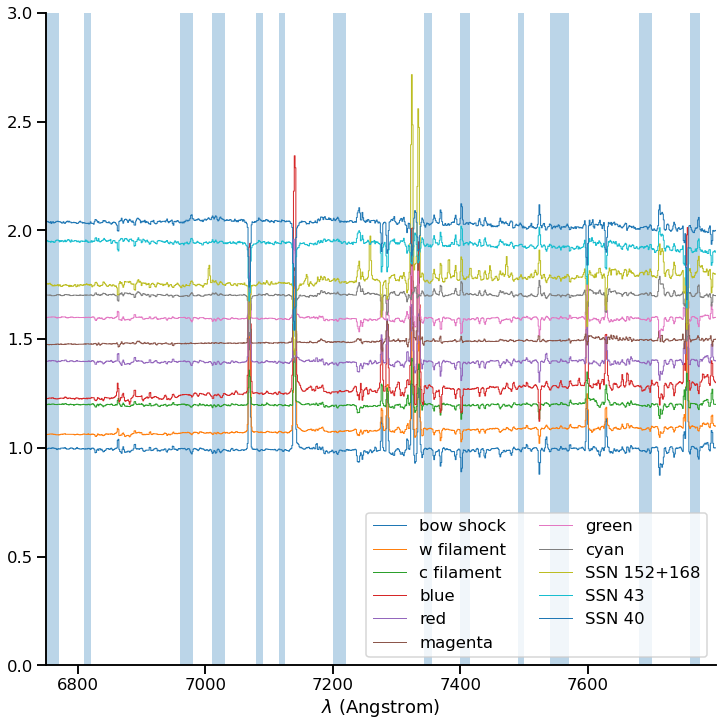

In [67]:
fig, ax = plt.subplots(figsize=(12, 12))

offset = 0
for label, box in mboxes.items():
    yslice, xslice = box.slices
    spec = cube[:, yslice, xslice].mean(axis=(1, 2))
    spec = spec / avspec
    (offset + spec / spec.data[-1]).plot(label=label)
    offset += 0.1

for label, box in sboxes.items():
    yslice, xslice = box.slices
    spec = cube[:, yslice, xslice].mean(axis=(1, 2))
    spec = spec / avspec
    (offset + spec / spec.data[-1]).plot(label=label)
    offset += 0.1

for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.legend(ncol=2)
ax.set(
    ylim=[0.0, 3.0],
)
sns.despine()

In [68]:
yslice, xslice = sboxes["SSN 152+168"].slices
subcube = cube[:, yslice, xslice]
contcube = extract.fit_continuum(
    subcube,
    wav_ranges=wavranges,
    deg=3,
    median=False,
)

extract.fit_continuum: row 0


        Use get_overlap_slices instead. [warnings]


[(800.0, 1500.0)]

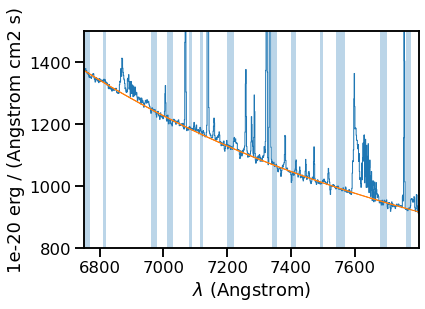

In [73]:
fig, ax = plt.subplots()
subcube.mean(axis=(1, 2)).plot()
contcube.mean(axis=(1, 2)).plot()
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(ylim=[800, 1500])

In [75]:
yslice, xslice = mboxes["bow shock"].slices
subcube = cube[:, yslice, xslice]
contcube = extract.fit_continuum(
    subcube,
    wav_ranges=wavranges,
    deg=3,
    median=False,
)

        Use get_overlap_slices instead. [warnings]


extract.fit_continuum: row 0
extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30


[(100.0, 250.0)]

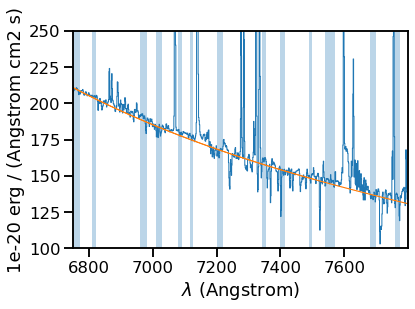

In [79]:
fig, ax = plt.subplots()
subcube.mean(axis=(1, 2)).plot()
contcube.mean(axis=(1, 2)).plot()
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(ylim=[100, 250])

In [80]:
contcube = extract.fit_continuum(
    cube,
    wav_ranges=wavranges,
    deg=3,
    median=False,
)

extract.fit_continuum: row 0


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:299: RuntimeWarning: divide by zero encountered in double_scalars
  off = (old[1]*new[0] - old[0]*new[1])/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:300: RuntimeWarning: divide by zero encountered in true_divide
  scl = newlen/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:368: RuntimeWarning: invalid value encountered in add
  return off + scl*x


extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30
extract.fit_continuum: row 40
extract.fit_continuum: row 50
extract.fit_continuum: row 60
extract.fit_continuum: row 70
extract.fit_continuum: row 80
extract.fit_continuum: row 90
extract.fit_continuum: row 100
extract.fit_continuum: row 110
extract.fit_continuum: row 120
extract.fit_continuum: row 130
extract.fit_continuum: row 140
extract.fit_continuum: row 150
extract.fit_continuum: row 160
extract.fit_continuum: row 170
extract.fit_continuum: row 180
extract.fit_continuum: row 190
extract.fit_continuum: row 200
extract.fit_continuum: row 210
extract.fit_continuum: row 220
extract.fit_continuum: row 230


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


extract.fit_continuum: row 240
extract.fit_continuum: row 250
extract.fit_continuum: row 260
extract.fit_continuum: row 270
extract.fit_continuum: row 280
extract.fit_continuum: row 290
extract.fit_continuum: row 300
extract.fit_continuum: row 310
extract.fit_continuum: row 320


        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]


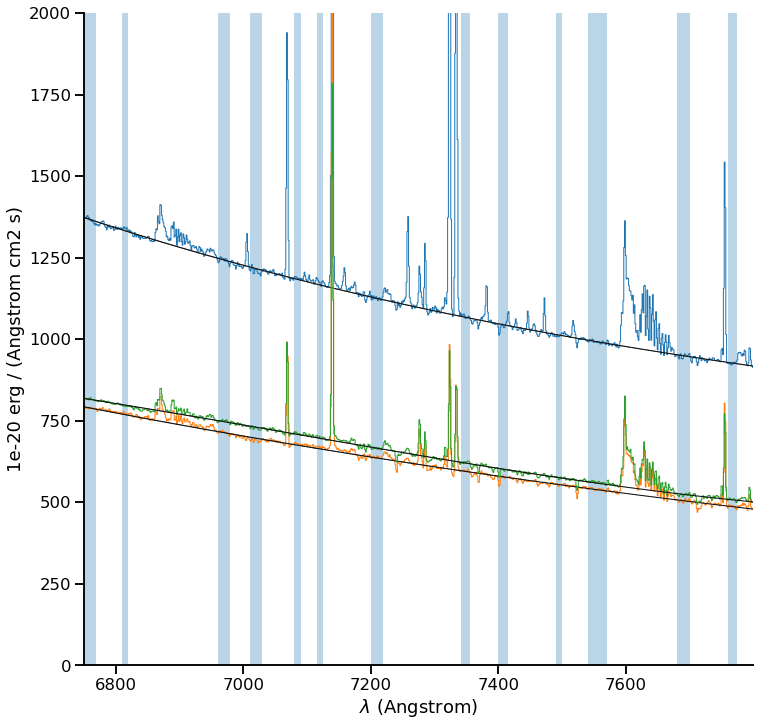

In [84]:
fig, ax = plt.subplots(figsize=(12, 12))
for box in sboxes.values():
    yslice, xslice = box.slices
    spec = cube[:, yslice, xslice].mean(axis=(1, 2))
    cspec = contcube[:, yslice, xslice].mean(axis=(1, 2))
    spec.plot()
    cspec.plot(color="k")

for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(
    ylim=[0, 2000],
)
sns.despine()

        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]


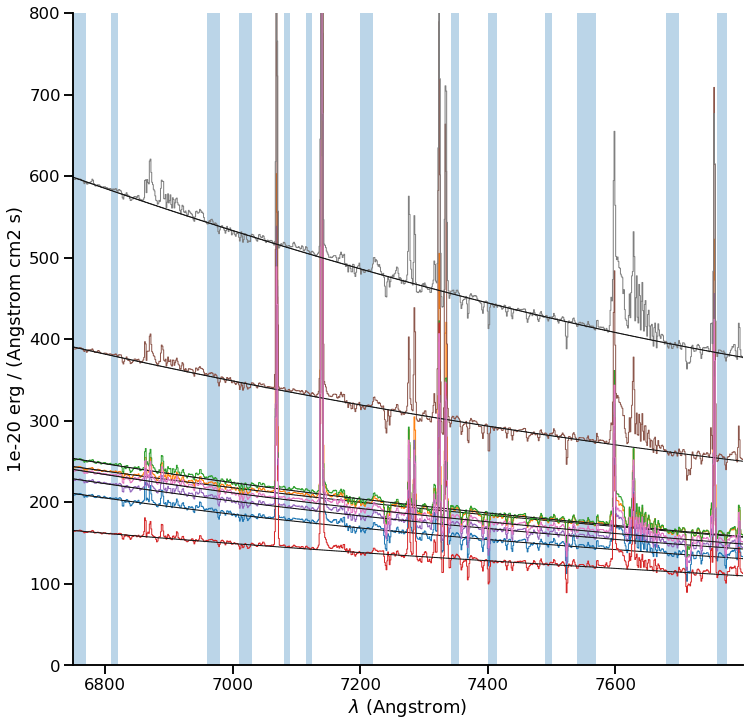

In [82]:
fig, ax = plt.subplots(figsize=(12, 12))
for box in mboxes.values():
    yslice, xslice = box.slices
    spec = cube[:, yslice, xslice].mean(axis=(1, 2))
    cspec = contcube[:, yslice, xslice].mean(axis=(1, 2))
    spec.plot()
    cspec.plot(color="k")

for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(
    ylim=[0, 800],
)
sns.despine()

In [85]:
prefix = f"../../big-data/ngc346-PZ-{wavmin:d}-{wavmax:d}-cube"
csubcube = cube - contcube
cdivcube = cube / contcube
csubcube.write(
    f"{prefix}-contsub.fits",
    savemask="nan",
)
cdivcube.write(
    f"{prefix}-contdiv.fits",
    savemask="nan",
)
contcube.write(
    f"{prefix}-cont.fits",
    savemask="nan",
)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)


### The [Ar IV] auroral lines

In [86]:
yslice, xslice = mboxes["bow shock"].slices
bowspec_sub = csubcube[:, yslice, xslice].mean(axis=(1, 2))
avspec_sub = csubcube.median(axis=(1, 2))
medspec_sub = csubcube.median(axis=(1, 2))

        Use get_overlap_slices instead. [warnings]


In [87]:
ariv_lines = [7170.5, 7237.4, 7262.7, 7331.4]

[(-2.0, 20.0)]

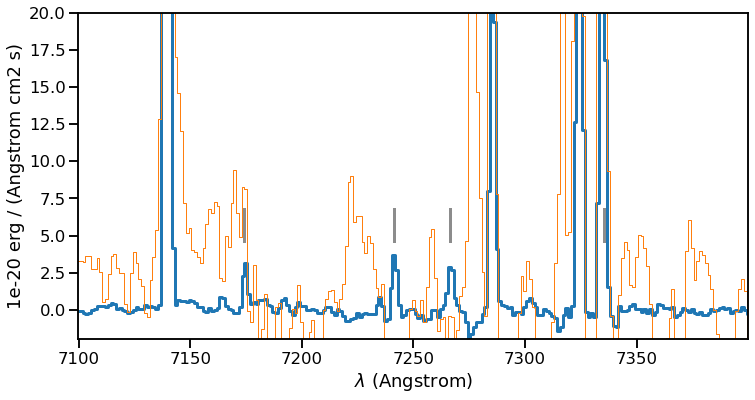

In [92]:
fig, ax = plt.subplots(figsize=(12, 6))
(bowspec_sub - medspec_sub).subspec(7100, 7400).plot(linewidth=3)
medspec_sub.subspec(7100, 7400).plot()
for wav in ariv_lines:
    ax.axvline(
        wav * (1.0 + 160.0 / 3e5), ymin=0.3, ymax=0.4, color="k", linewidth=3, alpha=0.5
    )
ax.set(
    ylim=[-2, 20],
)

So subtracting the median spectrum is vital with the PZ cube. With the subtraction (blue line) we get a reasonable spectrum that is very similar to the one from the ESO cube. 

But without the median subtraction (orange line) we get a complete mess

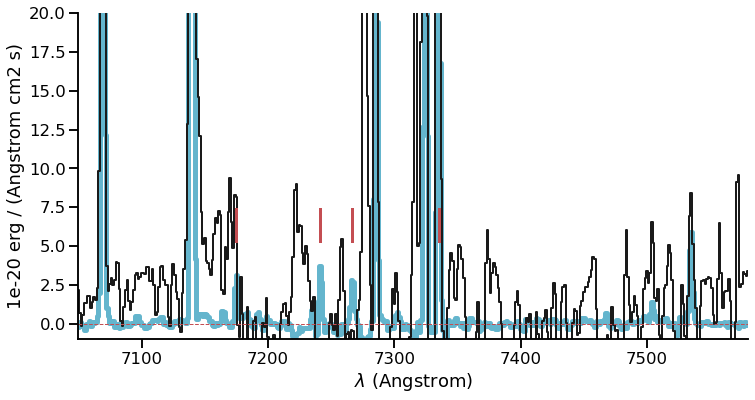

In [93]:
wav1, wav2 = 7050, 7580
fig, ax = plt.subplots(figsize=(12, 6))
(bowspec_sub - medspec_sub).subspec(wav1, wav2).plot(linewidth=5, alpha=1.0, color="c")
(medspec_sub).subspec(wav1, wav2).plot(color="k", linewidth=2)
for wav in ariv_lines:
    ax.axvline(
        wav * (1.0 + 160.0 / 3e5), ymin=0.3, ymax=0.4, color="r", linewidth=3, alpha=1.0
    )
ax.axhline(0.0, linestyle="dashed", color="r", linewidth=1)
ax.set(
    ylim=[-1, 20],
)
sns.despine()
fig.savefig(moments.FIGPATH / f"ngc346-PZ-bow-shock-spec-{wav1}-{wav2}.pdf")

Left to right
* 7065.28 He I
* 7135.78 [Ar III]
* Then the [Ar IV] lines
* 7281.35 He I
* 7320+30 [O II]
* 7499.85 He I
* 7530.80 [Cl IV]

Also lots of sky lines

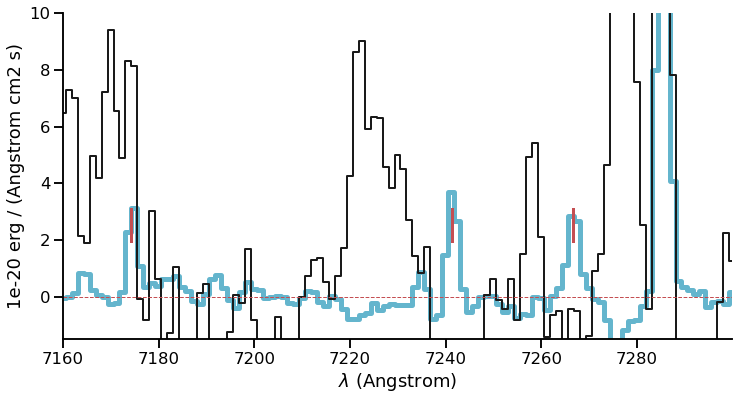

In [94]:
wav1, wav2 = 7160, 7300
fig, ax = plt.subplots(figsize=(12, 6))
(bowspec_sub - medspec_sub).subspec(wav1, wav2).plot(linewidth=5, alpha=1.0, color="c")
(medspec_sub).subspec(wav1, wav2).plot(color="k", linewidth=2)
for wav in ariv_lines:
    ax.axvline(
        wav * (1.0 + 160.0 / 3e5), ymin=0.3, ymax=0.4, color="r", linewidth=3, alpha=1.0
    )
ax.axhline(0.0, linestyle="dashed", color="r", linewidth=1)
ax.set(
    ylim=[-1.5, 10],
)
sns.despine()

Time to break out the median-subtracted cube I guess

In [97]:
cmsubcube = csubcube.copy()
cmsubcube.data -= medspec_sub.data[:, None, None]

In [98]:
mom7171 = moments.find_moments(cmsubcube.select_lambda(7171, 7179))
mom7237 = moments.find_moments(cmsubcube.select_lambda(7237, 7245))
mom7263 = moments.find_moments(cmsubcube.select_lambda(7263, 7271))

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:43: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:43: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:43: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


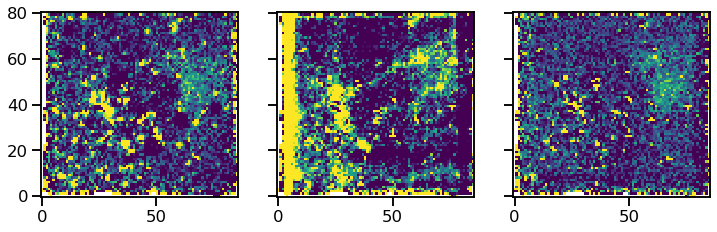

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True)

scale = "linear"
mom7171[0].rebin(4).plot(ax=axes[0], vmin=-4.0, vmax=20.0, scale=scale)
mom7237[0].rebin(4).plot(ax=axes[1], vmin=-4.0, vmax=20.0, scale=scale)
mom7263[0].rebin(4).plot(ax=axes[2], vmin=-4.0, vmax=20.0, scale=scale)

So this is pretty good. The maps are just as good as the ESO cube ones. 

7263 is the best, and 7171 is tolerable, but more affected by stellar sources. 7237 is blended with both a sky line and a DRL, so it is a lot messier

In [100]:
moments.save_moments_to_fits(
    mom7171,
    label="7171",
    flabel="ngc346-PZ-ariv",
    restwav=7170.5,
)
moments.save_moments_to_fits(
    mom7237,
    label="7237",
    flabel="ngc346-PZ-ariv",
    restwav=7237.4,
)
moments.save_moments_to_fits(
    mom7263,
    label="7263",
    flabel="ngc346-PZ-ariv",
    restwav=7262.7,
)

### The [Cl IV] 7531 line

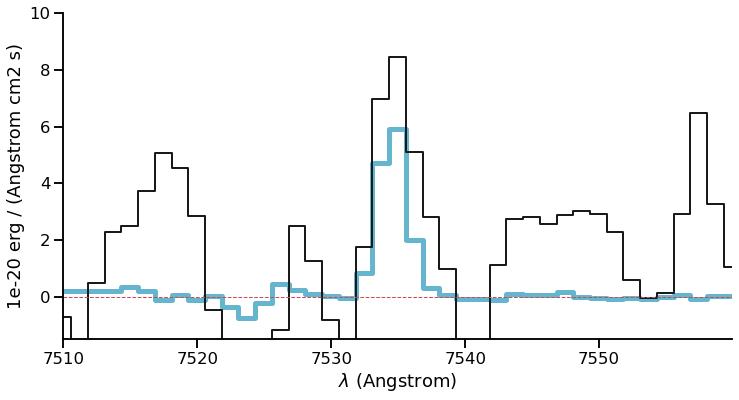

In [101]:
wav1, wav2 = 7510, 7560
fig, ax = plt.subplots(figsize=(12, 6))
(bowspec_sub - medspec_sub).subspec(wav1, wav2).plot(linewidth=5, alpha=1.0, color="c")
(medspec_sub).subspec(wav1, wav2).plot(color="k", linewidth=2)
for wav in ariv_lines:
    ax.axvline(
        wav * (1.0 + 160.0 / 3e5), ymin=0.3, ymax=0.4, color="r", linewidth=3, alpha=1.0
    )
ax.axhline(0.0, linestyle="dashed", color="r", linewidth=1)
ax.set(
    ylim=[-1.5, 10],
)
sns.despine()

In [102]:
mom7531 = moments.find_moments(cmsubcube.select_lambda(7532.5, 7537.5))

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:43: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


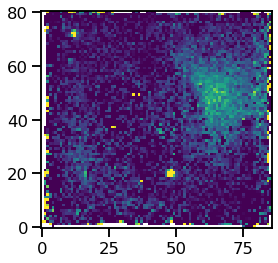

In [103]:
mom7531[0].rebin(4).plot(vmin=-3.0, vmax=30.0, scale="linear")

This looks really good

In [104]:
moments.save_moments_to_fits(
    mom7531,
    label="7531",
    flabel="ngc346-PZ-cliv",
    restwav=7530.80,
)

### The [Ar III] 7136 line



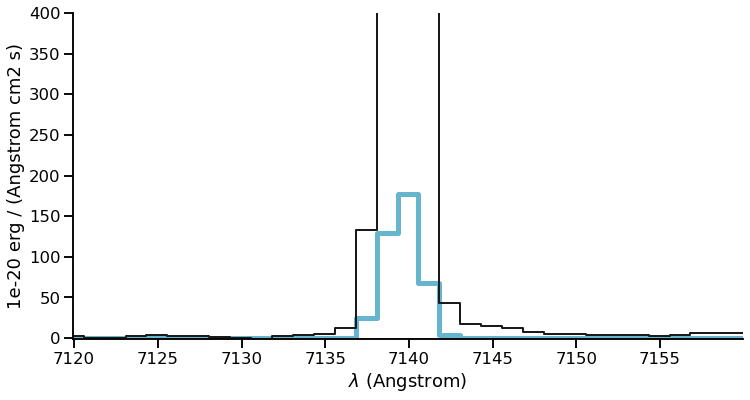

In [105]:
wav1, wav2 = 7120, 7160
fig, ax = plt.subplots(figsize=(12, 6))
(bowspec_sub - medspec_sub).subspec(wav1, wav2).plot(linewidth=5, alpha=1.0, color="c")
(medspec_sub).subspec(wav1, wav2).plot(color="k", linewidth=2)
for wav in ariv_lines:
    ax.axvline(
        wav * (1.0 + 160.0 / 3e5), ymin=0.3, ymax=0.4, color="r", linewidth=3, alpha=1.0
    )
ax.axhline(0.0, linestyle="dashed", color="r", linewidth=1)
ax.set(
    ylim=[-1.5, 400],
)
sns.despine()

This one is so bright (and evenly spread over the nebula) that we should not use the median-subtracted cube

In [112]:
mom7136 = moments.find_moments(csubcube.select_lambda(7135, 7145))

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:43: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


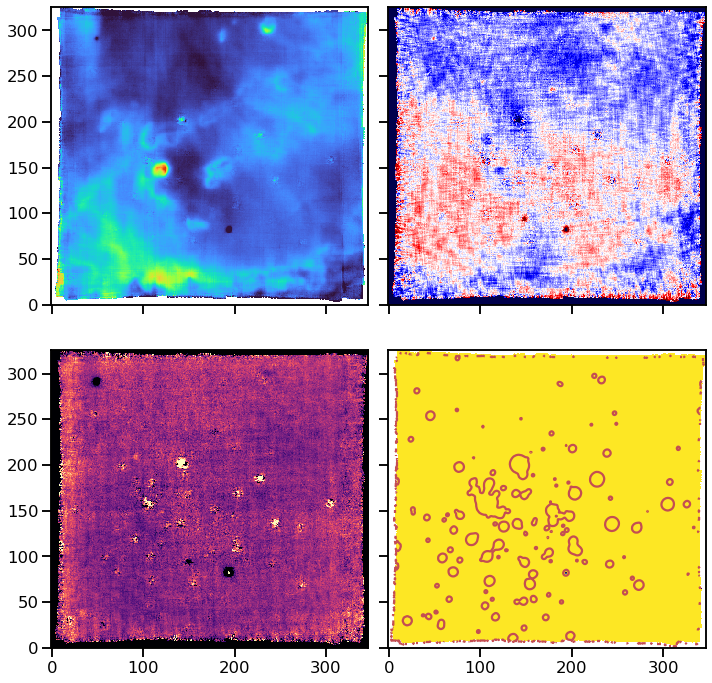

In [132]:
fig, axes = plt.subplots(
    2,
    2,
    figsize=(10, 10),
    sharex=True,
    sharey=True,
)

imap = mom7136[0].copy()
vmap = 3e5 * (mom7136[1] / 7135.78 - 1.0)
smap = 3e5 * (mom7136[2] / 7135.78)


# m = imap.data > 10.

# vmap.mask = vmap.mask | (~m)
# smap.mask = smap.mask | (~m)

imap.rebin(1).plot(
    vmin=15e2,
    vmax=9e3,
    cmap="turbo",
    ax=axes[0, 0],
)

vmap.rebin(1).plot(
    vmin=150,
    vmax=180,
    cmap="seismic",
    ax=axes[0, 1],
)

smap.rebin(1).plot(
    vmin=40,
    vmax=60,
    cmap="magma",
    ax=axes[1, 0],
)

imap.rebin(1).plot(
    vmin=-500,
    vmax=0,
    cmap="viridis",
    ax=axes[1, 1],
)
axes[1, 1].contour(
    bg_5875.data,
    levels=[1000],
    colors="r",
)

fig.tight_layout()

In [128]:
mom_pars = dict(
    restwav=7135.78,
    irange=[1.0e3, 2e4],
    vrange=[150, 180],
    srange=[30, 70],
)

In [129]:
moments.save_moments_to_fits(
    mom7136,
    label="7136",
    flabel="ngc346-PZ-ariii",
    **mom_pars,
)

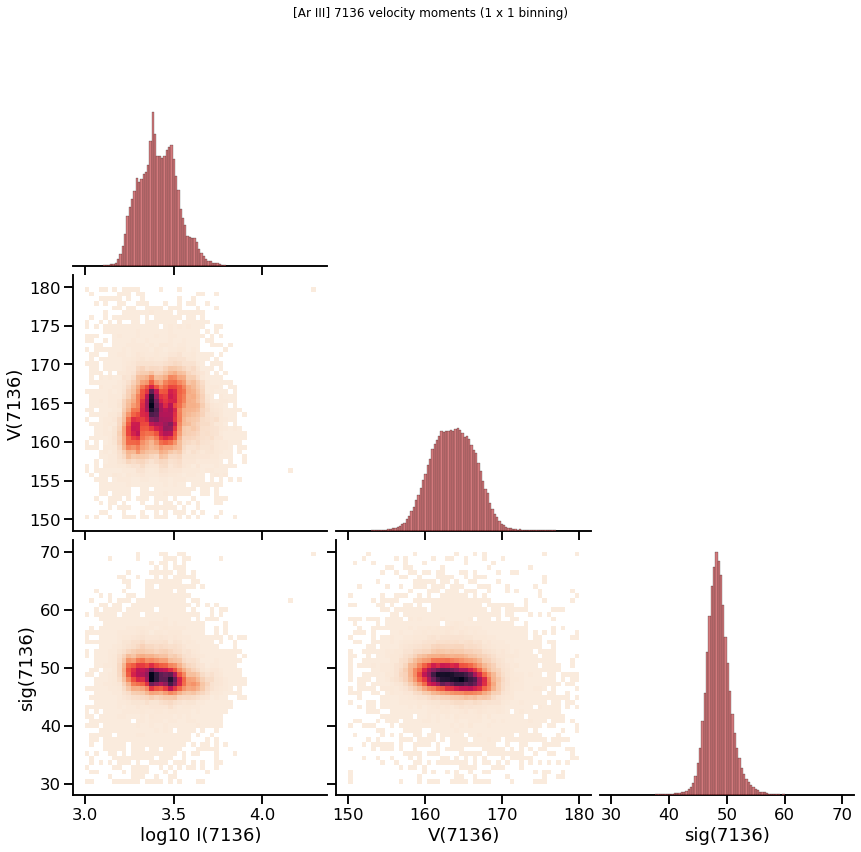

In [130]:
plot_pars = dict(
    ilabel="[Ar III]",
    label="7136",
    flabel="ngc346-PZ-ariii",
    **mom_pars,
)
g = moments.moments_corner_plot(
    mom7136,
    rebin=1,
    **plot_pars,
)

This is the best example yet for the kinematics. Everything is sharpened up a bit, as compared with the H and He lines. We now see that there are clearly 4 different clumps in the I-V plane. Also, there are weak negative trends of sigma with I and V

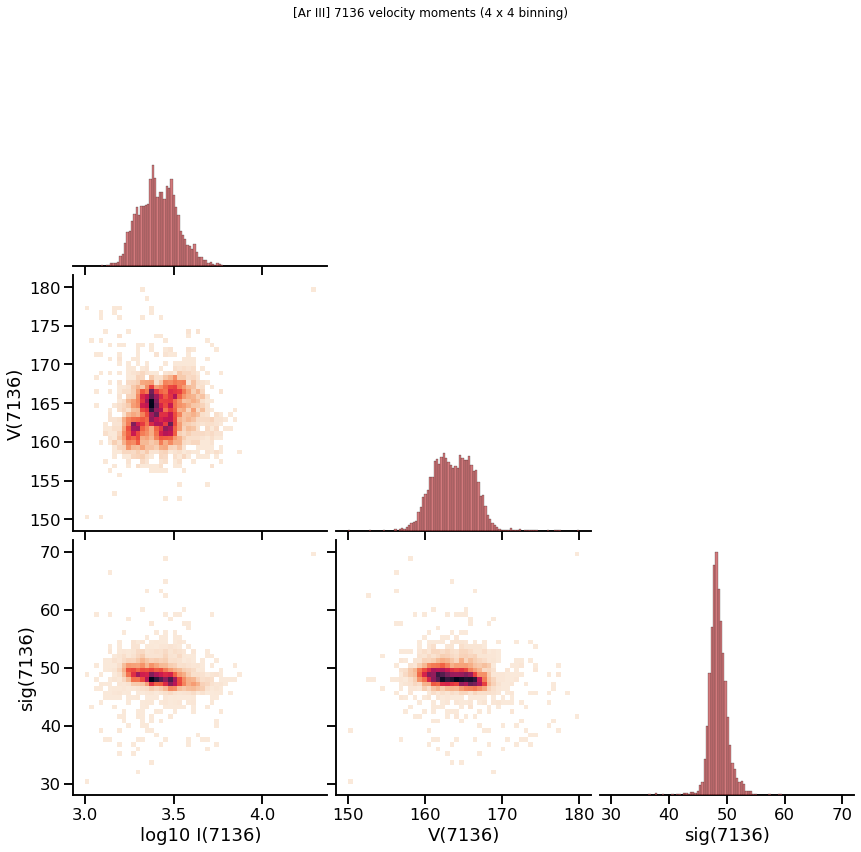

In [133]:
plot_pars = dict(
    ilabel="[Ar III]",
    label="7136",
    flabel="ngc346-PZ-ariii",
    **mom_pars,
)
g = moments.moments_corner_plot(
    mom7136,
    rebin=4,
    **plot_pars,
)

Even better with the 4x4 binning. And this is also far better than what we got with the ESO cube, so this is a case whwre the PZ cube offers a clear advantage. 

## Third, the far-red range

We just go as var as the Paschen limit, since there is no point fitting a polynomial across an ionization edge.

In [134]:
wavmin, wavmax = 7800, 8200
cube = cube0.select_lambda(wavmin, wavmax)

In [135]:
avspec = cube.mean(axis=(1, 2))

In [136]:
wavranges = [
    (7812, 7817),
    (7828, 7837),
    (7902, 7909),
    (7935, 7945),
    (8030, 8040),
    (8070, 8080),
    (8132, 8140),
    (8165, 8180),
]

        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]


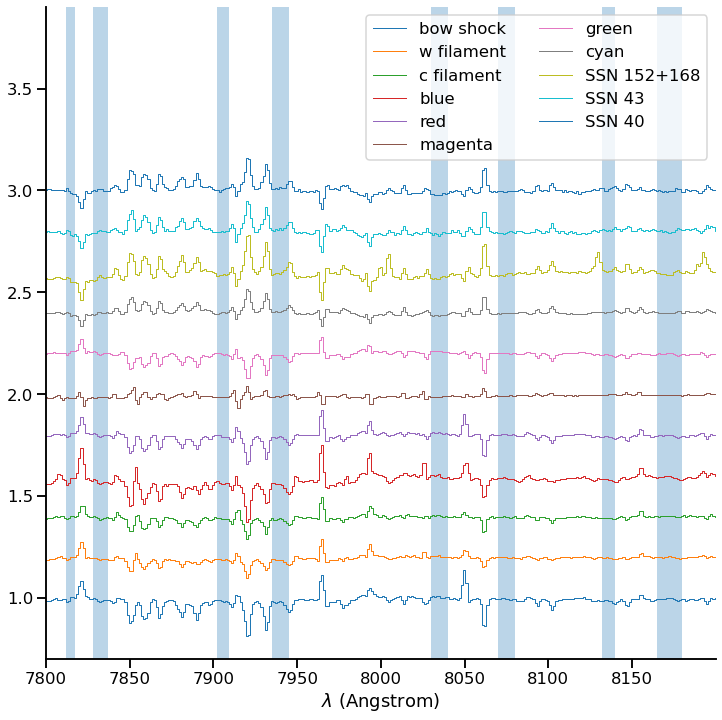

In [137]:
fig, ax = plt.subplots(figsize=(12, 12))

offset = 0
for label, box in mboxes.items():
    yslice, xslice = box.slices
    spec = cube[:, yslice, xslice].mean(axis=(1, 2))
    spec = spec / avspec
    (offset + spec / spec.data[-1]).plot(label=label)
    offset += 0.2

for label, box in sboxes.items():
    yslice, xslice = box.slices
    spec = cube[:, yslice, xslice].mean(axis=(1, 2))
    spec = spec / avspec
    (offset + spec / spec.data[-1]).plot(label=label)
    offset += 0.2

for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.legend(ncol=2)
ax.set(
    ylim=[0.7, 3.9],
)
sns.despine()

extract.fit_continuum: row 0


        Use get_overlap_slices instead. [warnings]


[(773.4178294711643, 982.5857190450032)]

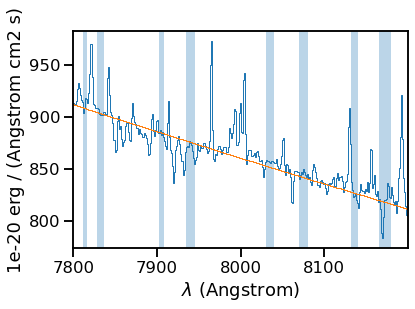

In [139]:
yslice, xslice = sboxes["SSN 152+168"].slices
subcube = cube[:, yslice, xslice]
contcube = extract.fit_continuum(
    subcube,
    wav_ranges=wavranges,
    deg=2,
    median=False,
)
fig, ax = plt.subplots()
subcube.mean(axis=(1, 2)).plot()
contcube.mean(axis=(1, 2)).plot()
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(ylim=[None, None])

In [140]:
yslice, xslice = mboxes["bow shock"].slices
subcube = cube[:, yslice, xslice]
contcube = extract.fit_continuum(
    subcube,
    wav_ranges=wavranges,
    deg=2,
    median=False,
)

        Use get_overlap_slices instead. [warnings]


extract.fit_continuum: row 0
extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30


[(0.0, 180.0)]

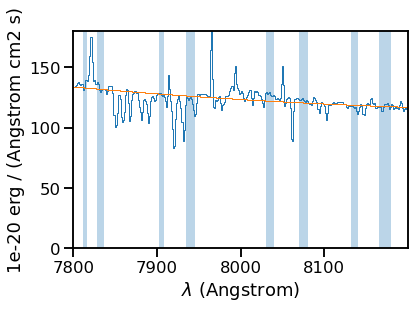

In [143]:
fig, ax = plt.subplots()
subcube.mean(axis=(1, 2)).plot()
contcube.mean(axis=(1, 2)).plot()
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(ylim=[0, 180])

In [144]:
contcube = extract.fit_continuum(
    cube,
    wav_ranges=wavranges,
    deg=2,
    median=False,
)

extract.fit_continuum: row 0


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30
extract.fit_continuum: row 40
extract.fit_continuum: row 50
extract.fit_continuum: row 60
extract.fit_continuum: row 70
extract.fit_continuum: row 80
extract.fit_continuum: row 90
extract.fit_continuum: row 100
extract.fit_continuum: row 110
extract.fit_continuum: row 120
extract.fit_continuum: row 130
extract.fit_continuum: row 140
extract.fit_continuum: row 150
extract.fit_continuum: row 160
extract.fit_continuum: row 170
extract.fit_continuum: row 180
extract.fit_continuum: row 190
extract.fit_continuum: row 200
extract.fit_continuum: row 210
extract.fit_continuum: row 220
extract.fit_continuum: row 230
extract.fit_continuum: row 240
extract.fit_continuum: row 250
extract.fit_continuum: row 260
extract.fit_continuum: row 270
extract.fit_continuum: row 280
extract.fit_continuum: row 290
extract.fit_continuum: row 300
extract.fit_continuum: row 310
extract.fit_continuum: row 320


        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]


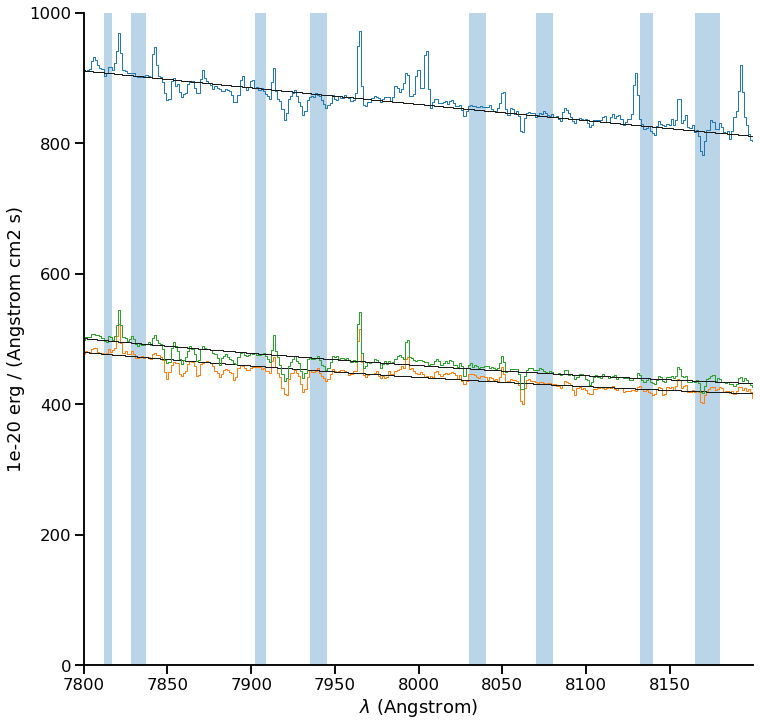

In [146]:
fig, ax = plt.subplots(figsize=(12, 12))
for box in sboxes.values():
    yslice, xslice = box.slices
    spec = cube[:, yslice, xslice].mean(axis=(1, 2))
    cspec = contcube[:, yslice, xslice].mean(axis=(1, 2))
    spec.plot()
    cspec.plot(color="k")

for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(
    ylim=[0, 1000],
)
sns.despine()

        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]


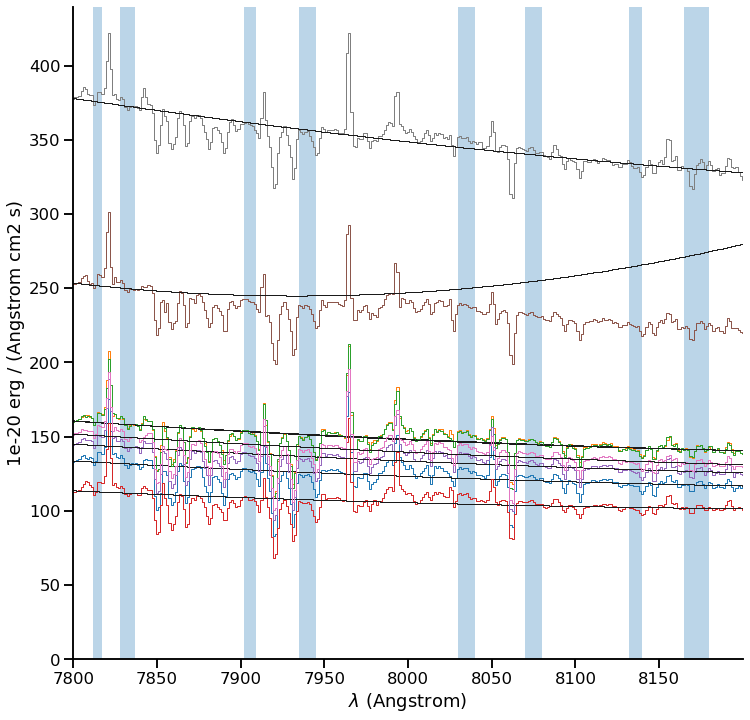

In [148]:
fig, ax = plt.subplots(figsize=(12, 12))
for box in mboxes.values():
    yslice, xslice = box.slices
    spec = cube[:, yslice, xslice].mean(axis=(1, 2))
    cspec = contcube[:, yslice, xslice].mean(axis=(1, 2))
    spec.plot()
    cspec.plot(color="k")

for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(
    ylim=[0, None],
)
sns.despine()

In [149]:
prefix = f"../../big-data/ngc346-PZ-{wavmin:d}-{wavmax:d}-cube"
csubcube = cube - contcube
cdivcube = cube / contcube
csubcube.write(
    f"{prefix}-contsub.fits",
    savemask="nan",
)
cdivcube.write(
    f"{prefix}-contdiv.fits",
    savemask="nan",
)
contcube.write(
    f"{prefix}-cont.fits",
    savemask="nan",
)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)


### Look at the far red range for interesting bow shock lines

In [151]:
yslice, xslice = mboxes["bow shock"].slices
bowspec_sub = csubcube[:, yslice, xslice].mean(axis=(1, 2))
avspec_sub = csubcube.median(axis=(1, 2))
medspec_sub = csubcube.median(axis=(1, 2))

        Use get_overlap_slices instead. [warnings]


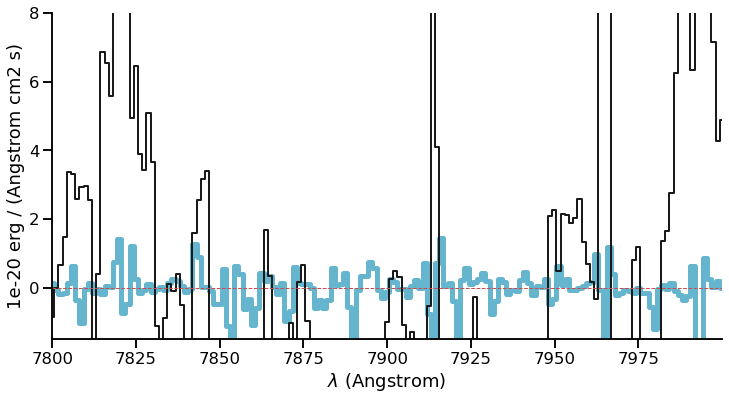

In [152]:
wav1, wav2 = 7800, 8000
fig, ax = plt.subplots(figsize=(12, 6))
(bowspec_sub - medspec_sub).subspec(wav1, wav2).plot(linewidth=5, alpha=1.0, color="c")
(medspec_sub).subspec(wav1, wav2).plot(color="k", linewidth=2)
for wav in ariv_lines:
    ax.axvline(
        wav * (1.0 + 160.0 / 3e5), ymin=0.3, ymax=0.4, color="r", linewidth=3, alpha=1.0
    )
ax.axhline(0.0, linestyle="dashed", color="r", linewidth=1)
ax.set(
    ylim=[-1.5, 8],
)
sns.despine()

There is nothing much interesting in this range.  Lots of weak He I lines. There are also a lot of low ionization lines, ssuch as Ca I], which I might want to come back to later.

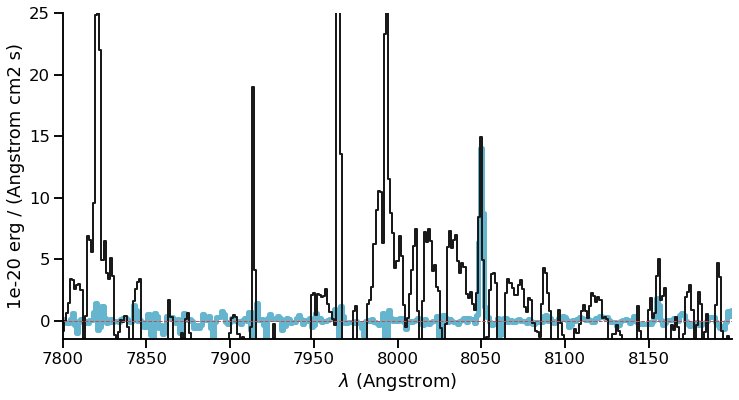

In [153]:
wav1, wav2 = 7800, 8200
fig, ax = plt.subplots(figsize=(12, 6))
(bowspec_sub - medspec_sub).subspec(wav1, wav2).plot(linewidth=5, alpha=1.0, color="c")
(medspec_sub).subspec(wav1, wav2).plot(color="k", linewidth=2)
for wav in ariv_lines:
    ax.axvline(
        wav * (1.0 + 160.0 / 3e5), ymin=0.3, ymax=0.4, color="r", linewidth=3, alpha=1.0
    )
ax.axhline(0.0, linestyle="dashed", color="r", linewidth=1)
ax.set(
    ylim=[-1.5, 25],
)
sns.despine()

This has the [Cl IV] 8045.62 line, although it is blended with a lower ionization line.

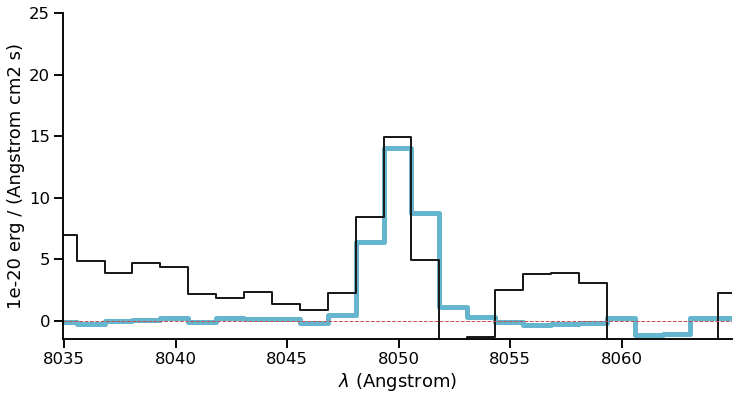

In [154]:
wav1, wav2 = 8035, 8065
fig, ax = plt.subplots(figsize=(12, 6))
(bowspec_sub - medspec_sub).subspec(wav1, wav2).plot(linewidth=5, alpha=1.0, color="c")
(medspec_sub).subspec(wav1, wav2).plot(color="k", linewidth=2)
for wav in ariv_lines:
    ax.axvline(
        wav * (1.0 + 160.0 / 3e5), ymin=0.3, ymax=0.4, color="r", linewidth=3, alpha=1.0
    )
ax.axhline(0.0, linestyle="dashed", color="r", linewidth=1)
ax.set(
    ylim=[-1.5, 25],
)
sns.despine()

In [155]:
mom8046 = moments.find_moments(csubcube.select_lambda(8046, 8054))

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:43: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


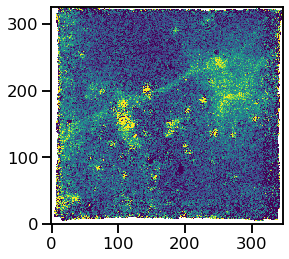

In [156]:
mom8046[0].rebin(1).plot(vmin=-3.0, vmax=100.0, scale="linear")

We can see a clear contamination by something coming from the filaments.

In [157]:
moments.save_moments_to_fits(
    mom8046,
    label="8046",
    flabel="ngc346-PZ-cliv",
    restwav=8045.62,
)

## Fourth and finally, the infrared range

In [158]:
wavmin, wavmax = 8200, 9400
cube = cube0.select_lambda(wavmin, wavmax)

In [159]:
avspec = cube.mean(axis=(1, 2))

In [160]:
wavranges = [
    (8207, 8214),
    (8250, 8270),
    (8480, 8490),
    (8520, 8540),
    (8570, 8580),
    (8740, 8750),
    (8800, 8820),
    # (8965, 8980),
    (9090, 9100),
    (9140, 9150),
    (9189, 9208),
    (9255, 9270),
]

        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]


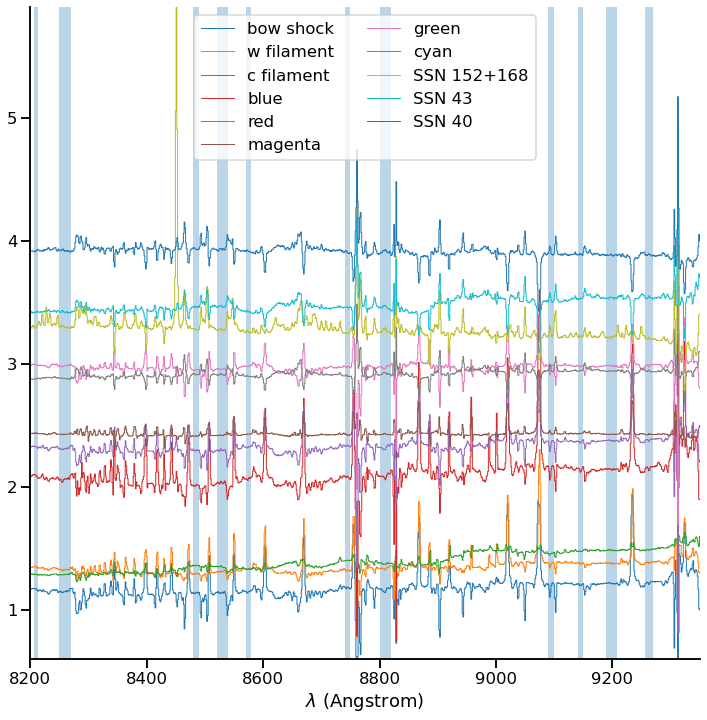

In [161]:
fig, ax = plt.subplots(figsize=(12, 12))

offset = 0
for label, box in mboxes.items():
    yslice, xslice = box.slices
    spec = cube[:, yslice, xslice].mean(axis=(1, 2))
    spec = spec / avspec
    (offset + spec / spec.data[-1]).plot(label=label)
    offset += 0.3

for label, box in sboxes.items():
    yslice, xslice = box.slices
    spec = cube[:, yslice, xslice].mean(axis=(1, 2))
    spec = spec / avspec
    (offset + spec / spec.data[-1]).plot(label=label)
    offset += 0.3

for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.legend(ncol=2)
ax.set(
    ylim=[0.6, 5.9],
)
sns.despine()

extract.fit_continuum: row 0


        Use get_overlap_slices instead. [warnings]


[(500.0, 1000.0)]

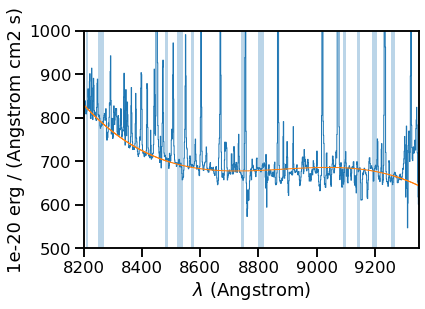

In [163]:
yslice, xslice = sboxes["SSN 152+168"].slices
subcube = cube[:, yslice, xslice]
contcube = extract.fit_continuum(
    subcube,
    wav_ranges=wavranges,
    deg=3,
    median=False,
)
fig, ax = plt.subplots()
subcube.mean(axis=(1, 2)).plot()
contcube.mean(axis=(1, 2)).plot()
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(ylim=[500, 1000])

In [164]:
yslice, xslice = mboxes["bow shock"].slices
subcube = cube[:, yslice, xslice]
contcube = extract.fit_continuum(
    subcube,
    wav_ranges=wavranges,
    deg=3,
    median=False,
)

        Use get_overlap_slices instead. [warnings]


extract.fit_continuum: row 0
extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30


[(0.0, 300.0)]

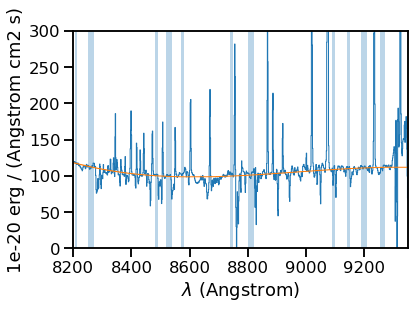

In [167]:
fig, ax = plt.subplots()
subcube.mean(axis=(1, 2)).plot()
contcube.mean(axis=(1, 2)).plot()
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(ylim=[0, 300])

In [168]:
contcube = extract.fit_continuum(
    cube,
    wav_ranges=wavranges,
    deg=3,
    median=False,
)

extract.fit_continuum: row 0


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:299: RuntimeWarning: divide by zero encountered in double_scalars
  off = (old[1]*new[0] - old[0]*new[1])/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:300: RuntimeWarning: divide by zero encountered in true_divide
  scl = newlen/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:368: RuntimeWarning: invalid value encountered in add
  return off + scl*x
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30
extract.fit_continuum: row 40
extract.fit_continuum: row 50
extract.fit_continuum: row 60
extract.fit_continuum: row 70
extract.fit_continuum: row 80
extract.fit_continuum: row 90
extract.fit_continuum: row 100
extract.fit_continuum: row 110
extract.fit_continuum: row 120
extract.fit_continuum: row 130
extract.fit_continuum: row 140
extract.fit_continuum: row 150
extract.fit_continuum: row 160
extract.fit_continuum: row 170
extract.fit_continuum: row 180
extract.fit_continuum: row 190
extract.fit_continuum: row 200
extract.fit_continuum: row 210
extract.fit_continuum: row 220
extract.fit_continuum: row 230
extract.fit_continuum: row 240
extract.fit_continuum: row 250
extract.fit_continuum: row 260
extract.fit_continuum: row 270
extract.fit_continuum: row 280
extract.fit_continuum: row 290
extract.fit_continuum: row 300
extract.fit_continuum: row 310
extract.fit_continuum: row 320


        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]


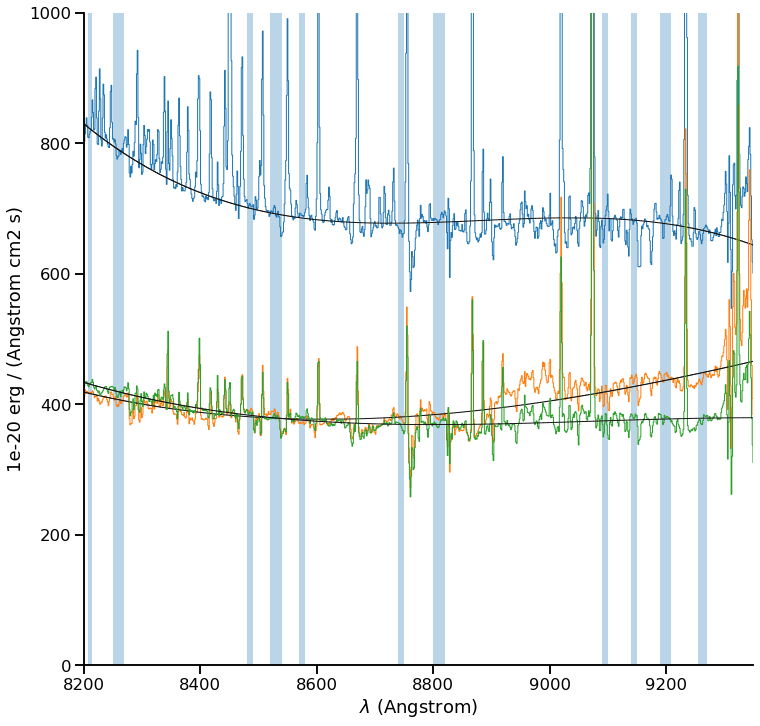

In [170]:
fig, ax = plt.subplots(figsize=(12, 12))
for box in sboxes.values():
    yslice, xslice = box.slices
    spec = cube[:, yslice, xslice].mean(axis=(1, 2))
    cspec = contcube[:, yslice, xslice].mean(axis=(1, 2))
    spec.plot()
    cspec.plot(color="k")

for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(
    ylim=[0, 1000],
)
sns.despine()

        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]


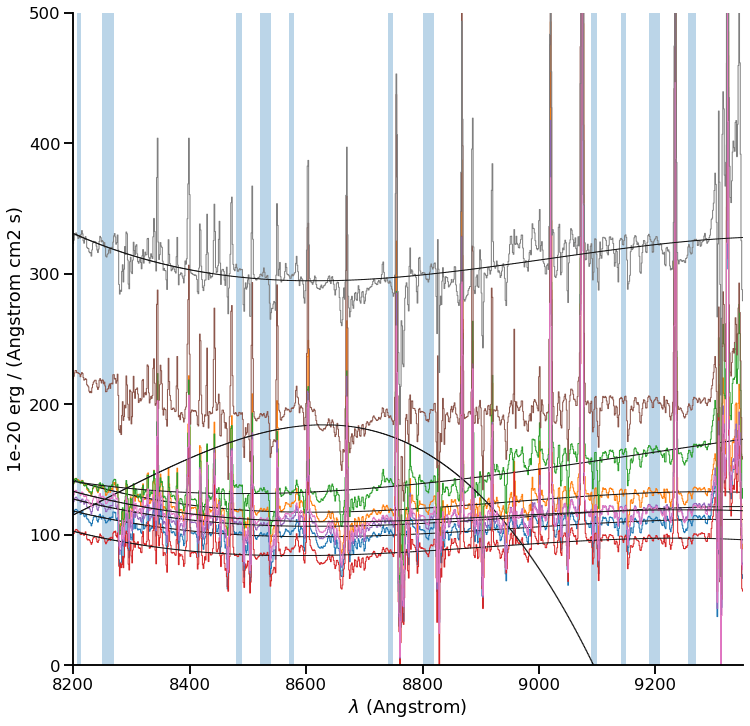

In [172]:
fig, ax = plt.subplots(figsize=(12, 12))
for box in mboxes.values():
    yslice, xslice = box.slices
    spec = cube[:, yslice, xslice].mean(axis=(1, 2))
    cspec = contcube[:, yslice, xslice].mean(axis=(1, 2))
    spec.plot()
    cspec.plot(color="k")

for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(
    ylim=[0, 500],
)
sns.despine()

Those continuum fits are not great, but apatr from the brown spectrum they are acceptable

In [173]:
prefix = f"../../big-data/ngc346-PZ-{wavmin:d}-{wavmax:d}-cube"
csubcube = cube - contcube
cdivcube = cube / contcube
csubcube.write(
    f"{prefix}-contsub.fits",
    savemask="nan",
)
cdivcube.write(
    f"{prefix}-contdiv.fits",
    savemask="nan",
)
contcube.write(
    f"{prefix}-cont.fits",
    savemask="nan",
)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)


Look at what we have got for the bow shock in the infrared range

In [174]:
yslice, xslice = mboxes["bow shock"].slices
bowspec_sub = csubcube[:, yslice, xslice].mean(axis=(1, 2))
avspec_sub = csubcube.median(axis=(1, 2))
medspec_sub = csubcube.median(axis=(1, 2))

        Use get_overlap_slices instead. [warnings]


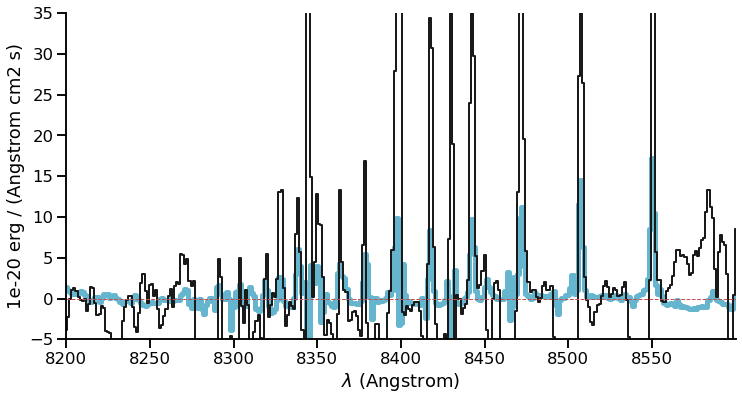

In [175]:
wav1, wav2 = 8200, 8600
fig, ax = plt.subplots(figsize=(12, 6))
(bowspec_sub - medspec_sub).subspec(wav1, wav2).plot(linewidth=5, alpha=1.0, color="c")
(medspec_sub).subspec(wav1, wav2).plot(color="k", linewidth=2)
for wav in ariv_lines:
    ax.axvline(
        wav * (1.0 + 160.0 / 3e5), ymin=0.3, ymax=0.4, color="r", linewidth=3, alpha=1.0
    )
ax.axhline(0.0, linestyle="dashed", color="r", linewidth=1)
ax.set(
    ylim=[-5, 35],
)
sns.despine()

Mostly H lines

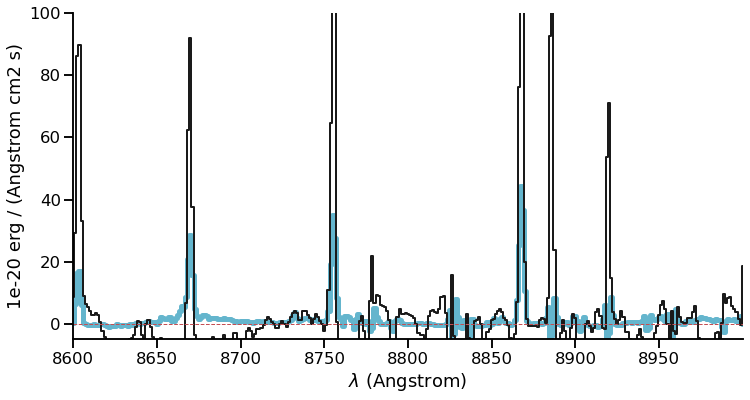

In [176]:
wav1, wav2 = 8600, 9000
fig, ax = plt.subplots(figsize=(12, 6))
(bowspec_sub - medspec_sub).subspec(wav1, wav2).plot(linewidth=5, alpha=1.0, color="c")
(medspec_sub).subspec(wav1, wav2).plot(color="k", linewidth=2)
for wav in ariv_lines:
    ax.axvline(
        wav * (1.0 + 160.0 / 3e5), ymin=0.3, ymax=0.4, color="r", linewidth=3, alpha=1.0
    )
ax.axhline(0.0, linestyle="dashed", color="r", linewidth=1)
ax.set(
    ylim=[-5, 100],
)
sns.despine()

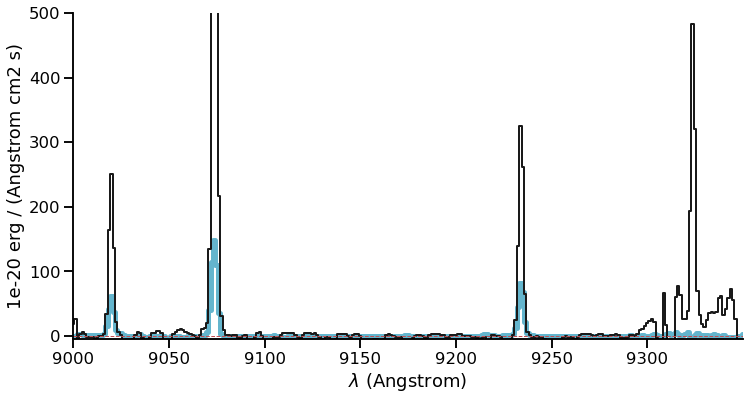

In [177]:
wav1, wav2 = 9000, 9400
fig, ax = plt.subplots(figsize=(12, 6))
(bowspec_sub - medspec_sub).subspec(wav1, wav2).plot(linewidth=5, alpha=1.0, color="c")
(medspec_sub).subspec(wav1, wav2).plot(color="k", linewidth=2)
for wav in ariv_lines:
    ax.axvline(
        wav * (1.0 + 160.0 / 3e5), ymin=0.3, ymax=0.4, color="r", linewidth=3, alpha=1.0
    )
ax.axhline(0.0, linestyle="dashed", color="r", linewidth=1)
ax.set(
    ylim=[-5, 500],
)
sns.despine()

The [S III] line and the brightest H line are all we need for the bow shock really.  We could grab the [C I] line too though.

### The [S III] 9069 line



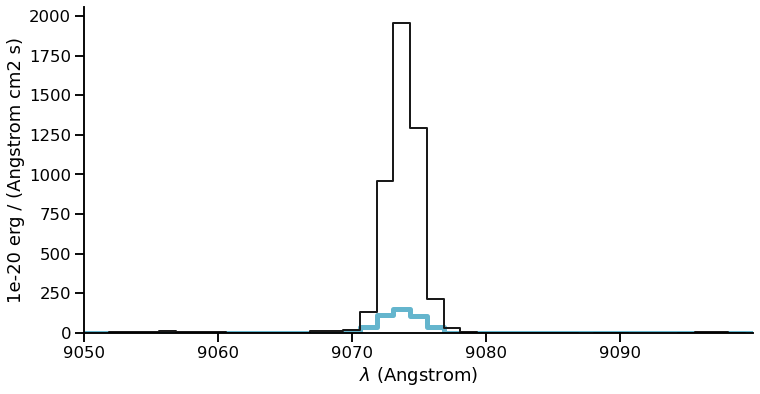

In [182]:
wav1, wav2 = 9050, 9100
fig, ax = plt.subplots(figsize=(12, 6))
(bowspec_sub - medspec_sub).subspec(wav1, wav2).plot(linewidth=5, alpha=1.0, color="c")
(medspec_sub).subspec(wav1, wav2).plot(color="k", linewidth=2)
ax.axhline(0.0, linestyle="dashed", color="r", linewidth=1)
ax.set(
    ylim=[-1.5, None],
)
sns.despine()

In [183]:
mom9069 = moments.find_moments(csubcube.select_lambda(9070, 9078))

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:43: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


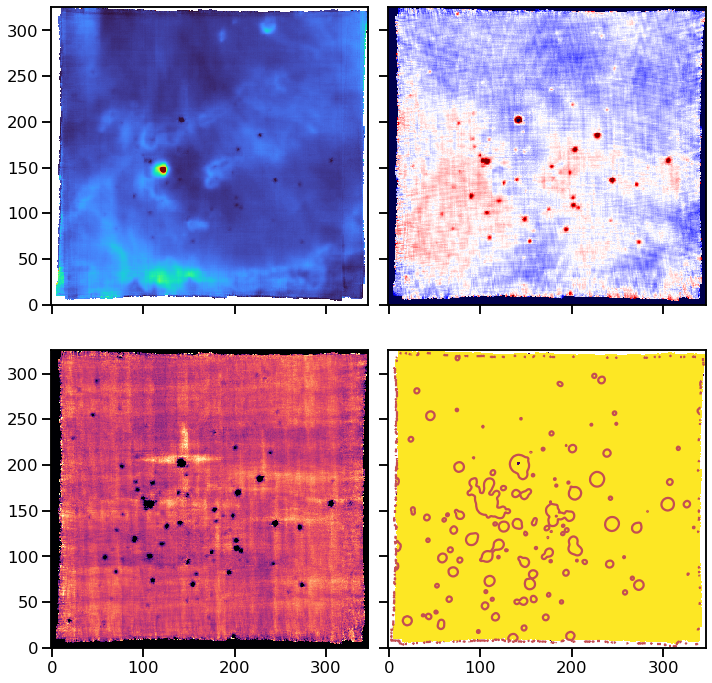

In [190]:
fig, axes = plt.subplots(
    2,
    2,
    figsize=(10, 10),
    sharex=True,
    sharey=True,
)

imap = mom9069[0].copy()
vmap = 3e5 * (mom9069[1] / 9068.90 - 1.0)
smap = 3e5 * (mom9069[2] / 9068.90)


# m = imap.data > 10.

# vmap.mask = vmap.mask | (~m)
# smap.mask = smap.mask | (~m)

imap.rebin(1).plot(
    vmin=2e3,
    vmax=3e4,
    cmap="turbo",
    ax=axes[0, 0],
)

vmap.rebin(1).plot(
    vmin=140,
    vmax=190,
    cmap="seismic",
    ax=axes[0, 1],
)

smap.rebin(1).plot(
    vmin=30,
    vmax=45,
    cmap="magma",
    ax=axes[1, 0],
)

imap.rebin(1).plot(
    vmin=-1000,
    vmax=0,
    cmap="viridis",
    ax=axes[1, 1],
)
axes[1, 1].contour(
    bg_5875.data,
    levels=[1000],
    colors="r",
)

fig.tight_layout()

In [191]:
mom_pars = dict(
    restwav=9068.9,
    irange=[2e3, 1e5],
    vrange=[150, 180],
    srange=[30, 45],
)

In [193]:
moments.save_moments_to_fits(
    mom9069,
    label="9069",
    flabel="ngc346-PZ-siii",
    restwav=9068.9,
)

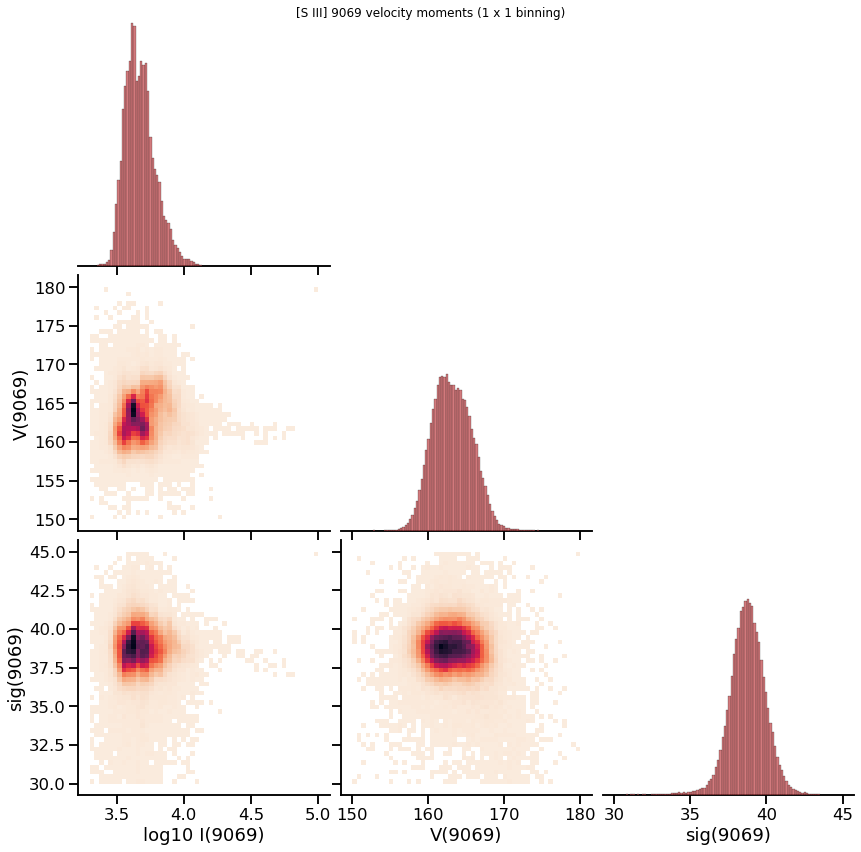

In [195]:
plot_pars = dict(
    ilabel="[S III]",
    label="9069",
    flabel="ngc346-PZ-ariii",
    **mom_pars,
)
g = moments.moments_corner_plot(
    mom9069,
    rebin=1,
    **plot_pars,
)

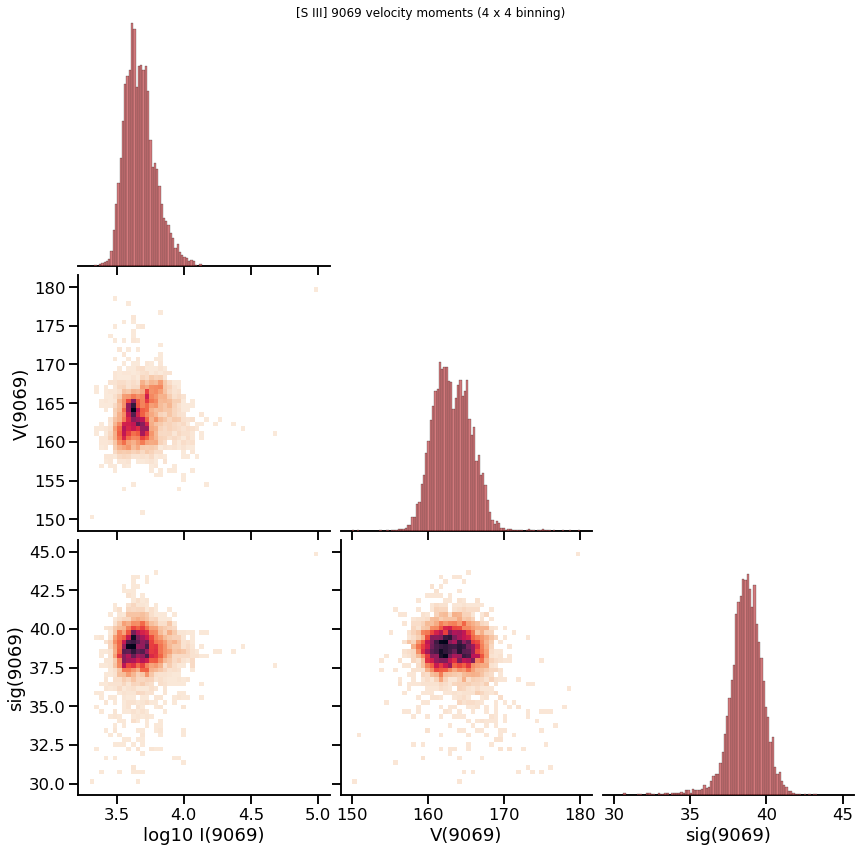

In [197]:
g = moments.moments_corner_plot(
    mom9069,
    rebin=4,
    **plot_pars,
)

These are very good again, similar to [Ar III], although this time we can also see a different V for the very brightest pixels (MYSO C), which is like 161 km/s. 

Also, we don't see the negative trend of sigma with brightness here, which makes me think that wnat we saw in [Ar III] might have been due to an unrecognised blend. 